In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [143]:
data_calc = pd.read_csv('../result/calc.csv',sep=' ', index_col=False)

In [144]:
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,0,2.402330e-01,1.975970e-01,3.110570e-01,5.231400e+05,2.126810e+04,5.231400e+05,2.126800e+04,5.444080e+05
1,1000,6.464660e+02,-2.231420e+03,2.323180e+03,1.152070e+11,1.055910e+12,1.152070e+11,1.055910e+12,1.171120e+12
2,2000,-2.932220e+02,-2.138150e+03,2.158160e+03,2.327150e+11,1.063110e+12,2.327150e+11,1.063110e+12,1.295820e+12
3,3000,-1.339390e+03,-8.389890e+04,8.390960e+04,2.585160e+11,6.586080e+14,2.585140e+11,6.586010e+14,6.588600e+14
4,4000,-9.227090e+02,-8.450120e+04,8.450630e+04,2.837320e+11,6.586300e+14,2.837310e+11,6.586230e+14,6.589070e+14
...,...,...,...,...,...,...,...,...,...
1995,1995000,3.798660e+06,-1.011560e+06,3.931040e+06,1.565460e+18,1.655860e+17,1.565440e+18,1.655850e+17,1.731030e+18
1996,1996000,3.801210e+06,-1.186160e+06,3.981980e+06,1.565460e+18,1.682090e+17,1.565440e+18,1.682080e+17,1.733650e+18
1997,1997000,3.802540e+06,-1.184780e+06,3.982840e+06,1.565460e+18,1.682090e+17,1.565450e+18,1.682080e+17,1.733650e+18
1998,1998000,3.804160e+06,-1.185250e+06,3.984530e+06,1.565460e+18,1.682090e+17,1.565440e+18,1.682080e+17,1.733650e+18


## Апроксимация

In [145]:
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [174]:
x = np.array([np.log1p(data_calc['N'][0])] + list(np.log(data_calc['N'][1:])))
y = np.log(data_calc['<ΔR^2>'])

coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

In [175]:
b = slope 
a = np.e**intercept 
a,b

(np.float64(1164.2602911304389), np.float64(2.3982066486282245))

In [176]:
def power_law_log(x, a, b):
    return a + x * b

def power_law(x, a, b):
    return a * x ** b

In [177]:
x_data = data_calc['N'][1:].values
y_data = data_calc['<ΔR^2>'][1:].values

np.seterr(over='ignore')
initial_guess = [1, 1]  # a = 1, b = 1

# Аппроксимация
params, covariance = curve_fit(power_law_log, x, y, p0=initial_guess)
a_opt, b_opt = params

print(f"Оптимальное a: {np.e**a_opt}")
print(f"Оптимальное b: {b_opt}")

Оптимальное a: 1164.2604409446737
Оптимальное b: 2.398206639181839


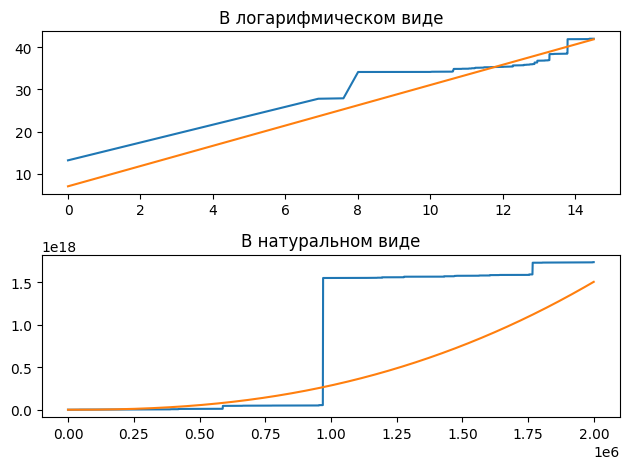

In [178]:
plt.figure()

plt.subplot(2, 1, 1) 
plt.title('В логарифмическом виде')
plt.plot(x, y)
plt.plot(x, power_law_log(x ,intercept,b))

plt.subplot(2, 1, 2) 
plt.title('В натуральном виде')
plt.plot(data_calc['N'], data_calc['<ΔR^2>'],the)
plt.plot(data_calc['N'], power_law(data_calc['N'], a, b))

plt.tight_layout() 
plt.show()

In [12]:
data_first_particle = pd.read_csv('../result/first_particle.csv',sep=' ', index_col=False)

In [13]:
data_first_particle

,x,y
0,-1.57587,0.000000e+00
1,-4.21742,0.000000e+00
2,-6.12226,0.000000e+00
3,-6.12226,-1.922390e-01
4,-6.12226,9.639280e-01
...,...,...
1999995,70663.60000,-2.580960e+06
1999996,70663.60000,-2.580960e+06
1999997,70663.60000,-2.580960e+06
1999998,70665.10000,-2.580960e+06


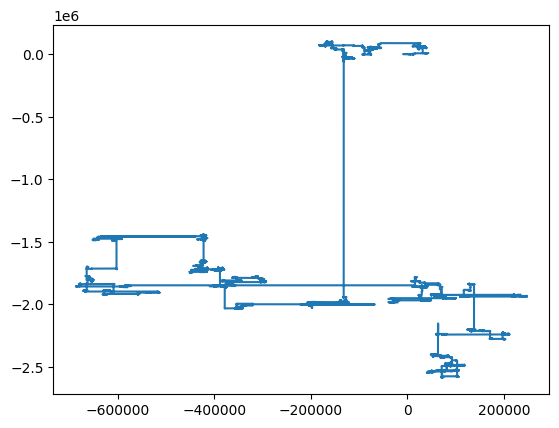

In [14]:
plt.plot(data_first_particle.x,data_first_particle.y)

In [15]:
data_last_vals = pd.read_csv('../result/last_vals.csv',sep=' ', index_col=False)

In [16]:
data_last_vals

,x,y
0,70665.1,-2580960.0
1,7490720.0,897591.0
2,1673260.0,3478620.0
3,2510480.0,-436700.0
4,667601.0,1024640.0
...,...,...
99995,359593.0,-2429370.0
99996,-644164.0,-18816900.0
99997,-1693350.0,-692476.0
99998,-1184790.0,-771556.0


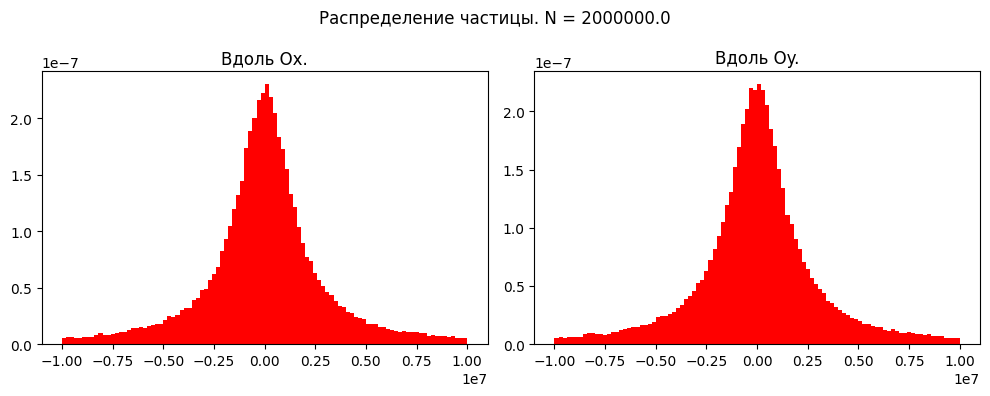

In [42]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частицы. N = {2e6}')

plt.subplot(1,2,1)
plt.hist(data_last_vals.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()

In [ ]:
shifts_arr_lastN = np.abs((first_particle[-1][1:] - first_particle[-1][:-1]).sum(axis=1))
shifts_arr_lastN.shape